# Assignment 5

Instructions:

a. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity.

b. Do not write your name on the assignment. (1 point)

c. Please include each question (or question number) followed by code and your answer (if applicable). Write your code in the ‘Code’ cells and your answer in the ‘Markdown’ cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade. (1/2 point value of each question)

d. Export your Jupyter notebook as a PDF file. If you get an error, make sure you have downloaded the MikTex software (for windows) or MacTex (for mac). Note that after installing MikTex/MacTex, you will need to check for updates, install the updates if needed, and re-start your system. Submit the PDF file. (1 point)


#### This assignment is due at 11:59pm on Wednesday, November 10th. Good luck!

*(30 points overall -- 28 points for code & answers, 2 points for anonymity and proper formatting)*

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1

*(5 points total)*

Read FIFA world cup attendance data from the page: https://en.wikipedia.org/wiki/FIFA_World_Cup . Use 'attendance' as the matching string to find the table. 

In [2]:
#Fix the importing error
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#Import FIFA dataset
fifa = pd.read_html('http://en.wikipedia.org/wiki/FIFA_World_Cup', match = 'attendance')
fifa = fifa[0]

fifa

Year              Hosts Venues/Cities Totalattendance Matches  \
       Year              Hosts Venues/Cities Totalattendance Matches   
0      1930            Uruguay           3/1          590549      18   
1      1934              Italy           8/8          363000      17   
2      1938             France          10/9          375700      18   
3      1950             Brazil           6/6         1045246      22   
4      1954        Switzerland           6/6          768607      26   
5      1958             Sweden         12/12          819810      35   
6      1962              Chile           4/4          893172      32   
7      1966            England           8/7         1563135      32   
8      1970             Mexico           5/5         1603975      32   
9      1974       West Germany           9/9         1865753      38   
10     1978          Argentina           6/5         1545791      38   
11     1982              Spain         17/14         2109723      52   
12     1986             Mexico         12/11         2394031      52   
13     1990              Italy         12/12         2516215      52   
14     1994      United States           9/9         3587538      52   
15     1998             France         10/10         2785100      64   
16     2002  South Korea Japan         20/20         2705197      64   
17     2006            Germany         12/12         3359439      64   
18     2010       South Africa          10/9         3178856      64   
19     2014             Brazil         12/12         3429873      64   
20     2018             Russia         12/11         3031768      64   
21  Overall            Overall       Overall        40532478     900   

   Avg.attendance Highest attendances †  \
   Avg.attendance                Number   
0           32808                 93000   
1           21353                 55000   
2           20872                 58455   
3           47511           173,850[84]   
4           29562                 63000   
5           23423                 50928   
6           27912                 68679   
7           48848                 98270   
8           50124                108192   
9           49099                 83168   
10          40679                 71712   
11          40572                 95500   
12          46039                114600   
13          48389                 74765   
14          68991                 94194   
15          43517                 80000   
16          42269                 69029   
17          52491                 72000   
18          49670                 84490   
19          53592                 74738   
20          47371                 78011   
21          45036                171772   

                                            \
                                     Venue   
0           Estadio Centenario, Montevideo   
1               Stadio Nazionale PNF, Rome   
2             Olympique de Colombes, Paris   
3         Maracanã Stadium, Rio de Janeiro   
4                   Wankdorf Stadium, Bern   
5               Ullevi Stadium, Gothenburg   
6               Estadio Nacional, Santiago   
7                  Wembley Stadium, London   
8              Estadio Azteca, Mexico City   
9              Olympiastadion, West Berlin   
10       River Plate Stadium, Buenos Aires   
11                     Camp Nou, Barcelona   
12             Estadio Azteca, Mexico City   
13                         San Siro, Milan   
14         Rose Bowl, Pasadena, California   
15            Stade de France, Saint-Denis   
16  International Stadium, Yokohama, Japan   
17                  Olympiastadion, Berlin   
18               Soccer City, Johannesburg   
19        Maracanã Stadium, Rio de Janeiro   
20                Luzhniki Stadium, Moscow   
21            Maracanã Stadium, Rio (1950)   

                                                       
                                              Game(s)  
0                  Uruguay 6

**(a)** Find the number of levels of column labels and row labels in the data *(2 points for code)*

In [3]:
#Finding the number of levels of column labels
fifa.columns.nlevels

2

In [29]:
fifa.index.nlevels

1

**(b)** Reduce the multiple levels of column labels to a single level as follows. If the column names at all the levels are different, then concatenate the names together. Otherwise, keep the name at the highest level. For example, if the column name is ('Hosts','Hosts'), it should change to 'Host'. If the column name is ('Highest attendances †','Number'), it should change to 'Highest attendances †Number'. Do not rename each column manually. Use a method that will work efficiently if there were a large number of columns, say 10,000 columns. *(3 points for code)*

In [50]:
same = ~(fifa.columns.get_level_values(1) == fifa.columns.get_level_values(0))

columnlist = np.array(fifa.columns.get_level_values(0))
columnlist[same] = fifa.columns.get_level_values(0)[same] + fifa.columns.get_level_values(1)[same]

fifa.columns = columnlist

,Year,Hosts,Venues/Cities,Totalattendance,Matches,Avg.attendance,Highest attendances †Number,Highest attendances †Venue,Highest attendances †Game(s)
0,1930,Uruguay,3/1,590549,18,32808,93000,"Estadio Centenario, Montevideo","Uruguay 6–1 Yugoslavia, Semi-final"
1,1934,Italy,8/8,363000,17,21353,55000,"Stadio Nazionale PNF, Rome","Italy 2–1 Czechoslovakia, Final"
2,1938,France,10/9,375700,18,20872,58455,"Olympique de Colombes, Paris","France 1–3 Italy, Quarter-final"
3,1950,Brazil,6/6,1045246,22,47511,"173,850[84]","Maracanã Stadium, Rio de Janeiro","Brazil 1–2 Uruguay, Deciding match"
4,1954,Switzerland,6/6,768607,26,29562,63000,"Wankdorf Stadium, Bern","West Germany 3–2 Hungary, Final"
5,1958,Sweden,12/12,819810,35,23423,50928,"Ullevi Stadium, Gothenburg","Brazil 2–0 Soviet Union, Group stage"
6,1962,Chile,4/4,893172,32,27912,68679,"Estadio Nacional, Santiago","Brazil 4–2 Chile, Semi-final"
7,1966,England,8/7,1563135,32,48848,98270,"Wembley Stadium, London","England 4–2 West Germany, Final"
8,1970,Mexico,5/5,1603975,32,50124,108192,"Estadio Azteca, Mexico City","Mexico 1–0 Belgium, Group stage"
9,1974,West Germany,9/9,1865753,38,49099,83168,"Olympiastadion, West Berlin","West Germany 1–0 Chile, Group stage"


## Part 2

*(7 points total)*

**(a)**: Read the GDP per capita data from https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita

Perform the following operations on this datatable:

In [5]:
#Import GDP dataset
gdp = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita')
gdp = gdp[1]

Country/Territory         Subregion    Region   IMF[3]          \
    Country/Territory         Subregion    Region Estimate    Year   
0            Monaco *    Western Europe    Europe      NaN     NaN   
1     Liechtenstein *    Western Europe    Europe      NaN     NaN   
2        Luxembourg *    Western Europe    Europe   131782  2021.0   
3           Bermuda *  Northern America  Americas      NaN     NaN   
4       Switzerland *    Western Europe    Europe    94696  2021.0   
..                ...               ...       ...      ...     ...   
211          Malawi *    Eastern Africa    Africa      432  2021.0   
212      Mozambique *    Eastern Africa    Africa      425  2021.0   
213         Somalia *    Eastern Africa    Africa      347  2021.0   
214     South Sudan *    Eastern Africa    Africa      315  2021.0   
215         Burundi *    Eastern Africa    Africa      265  2021.0   

    United Nations[4]       World Bank[5]          
             Estimate  Year      Estimate    Year  
0            190532.0  2019      190513.0  2019.0  
1            179258.0  2019      180367.0  2018.0  
2            115481.0  2019      115874.0  2020.0  
3            117768.0  2019      117098.0  2019.0  
4             85135.0  2019       86602.0  2020.0  
..                ...   ...           ...     ...  
211             435.0  2019         625.0  2020.0  
212             504.0  2019         449.0  2020.0  
213             105.0  2019         309.0  2020.0  
214             448.0  2019        1120.0  2015.0  
215             260.0  2019         274.0  2020.0  

[216 rows x 9 columns]

(i) Drop all the columns except Country and GDP per capita estimate by IMF. *(1 point for code)*

In [6]:
gdp.drop(columns = ["Subregion", "Region", "United Nations[4]", "World Bank[5]"], axis = 0, inplace = True)
gdp.columns = gdp.columns.droplevel(0)
gdp.drop(columns = "Year", inplace = True)
gdp["Country"] = gdp["Country/Territory"]

C:\Users\nvsim\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


(ii) The country names contain some special characters (characters other than letters) and need to be cleaned. The following code can help clean country names:

```import re```


```f = lambda x: re.sub(r'[^A-Za-z]', '', x)```

Apply the above lambda function on the country column to clean country names. *(1 point for code)*

In [7]:
#Importing re package
import re

#Setting lambda function
f = lambda x: re.sub(r'[^A-Za-z]', '', x)

#Applying function to Country column
gdp["Country"] = gdp["Country/Territory"].apply(f)

**(b)** Read the population data from https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)
Drop all columns except Country and Population (1 July 2019). *(1 point for code)*

In [8]:
pop = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)")
pop = pop[0]
pop.drop(columns = ["UN continentalregion[4]", "UN statisticalsubregion[4]", "Change", "Population(1 July 2018)"], inplace = True)
pop["Country"] = pop["Country/Area"]

**(c)** Merge the datasets obtained in (a) and (b) such that the merged dataset contains each observation of the GDP per capita data (dataset obtained in (a)), but not necessarily each observation of the population data (dataset obtained in (b)). *(2 points for code)*

In [9]:
merged = pd.merge(gdp, pop, how = "left")

**(d)** For how many countries in the GDP per capita data was the population not available in the population data? Note that you don't need to clean country names in the population table. *(1 point for code, 1 point for answer)*

In [10]:
merged.isnull().sum()

Country/Territory           0
Estimate                   21
Country                     0
Country/Area               74
Population(1 July 2019)    74
dtype: int64

There were 74 countries in the GDP per capita dataset where the population was not available.

## Part 3

*(16 points total)*

The dataset *Real GDP.csv* contains the GDP of each US State for all years starting from 1997 until 2020. The data is at State level, i.e., each observation corresponds to a unique State.

The dataset *Surplus.csv* contains the surplus of each US State for all years starting from 1997 until 2020. The data is at year level, i.e., each observation corresponds to a unique year.

The dataset *Compensation.csv* contains 'Compensation' and 'Chain-type quantity indexes for real GDP' for each US State and year starting from 1997 to 2020. The dataset is at Year-State-Description level, where 'Description' refers to either 'Compensation' or 'Chain-type quantity indexes for real GDP'. 

In [11]:
#Importing the datasets
realgdp = pd.read_csv("Real GDP.csv")
realgdp.drop(columns = "Description", inplace = True)
surplus = pd.read_csv("Surplus.csv")
compensation = pd.read_csv("Compensation.csv")

,Year,GeoName,Description,value
0,1997,Alabama,Chain-type quantity indexes for real GDP,76.356
1,1997,Alabama,Compensation (millions of dollars),61083.800
2,1997,Alaska,Chain-type quantity indexes for real GDP,72.424
3,1997,Alaska,Compensation (millions of dollars),12347.800
4,1997,Arizona,Chain-type quantity indexes for real GDP,62.043
...,...,...,...,...
2443,2020,West Virginia,Compensation (millions of dollars),40948.000
2444,2020,Wisconsin,Chain-type quantity indexes for real GDP,105.272
2445,2020,Wisconsin,Compensation (millions of dollars),197578.000
2446,2020,Wyoming,Chain-type quantity indexes for real GDP,93.312


**Q1)** Combine all these datasets to obtain a dataset at State-Year level, that contains the GDP, surplus, 'Compensation', and 'Chain-type quantity indexes for real GDP' for each US State and all years starting from 1997 until 2020. *Note that each observation must contain the name of the US State, year, and the four values (GDP, surplus, compensation, and Chain-type quantity indexes for real GDP).*

**Hint**: Here is one way to do it:
1) Melt the GDP dataset to year-State level \
2) Melt the Surplus dataset to year-State level \
3) Pivot the compensation dataset to year-State level

Now that all the datasets are at the year-State level, merge them!

*(4 points for code)*

In [12]:
#Melting Datasets
realgdp = pd.melt(realgdp, id_vars = "GeoName", var_name = "Year", value_name = "gdp")
surplus = pd.melt(surplus, id_vars = "Year", var_name = "GeoName", value_name = "surplus")
compensation = compensation.pivot(index = ["Year", "GeoName"], columns = "Description", values = "value")
compensation.reset_index(inplace = True)

In [13]:
#Changing type to be numeric
realgdp["Year"] = pd.to_numeric(realgdp["Year"])

In [14]:
#Merging Datasets
merge1 = pd.merge(realgdp, surplus)
merge2 = pd.merge(merge1, compensation)
merge2

,GeoName,Year,gdp,surplus,Chain-type quantity indexes for real GDP,Compensation (millions of dollars)
0,Alabama,1997,144501.2,37247.9,76.356,61083.8
1,Alaska,1997,42211.3,11061.3,72.424,12347.8
2,Arizona,1997,168408.8,53776.0,62.043,69876.9
3,Arkansas,1997,82571.3,23316.0,76.108,32715.5
4,California,1997,1378276.5,431069.4,65.225,574432.9
...,...,...,...,...,...,...
1219,Virginia,2020,473817.5,200788.1,106.243,327867.2
1220,Washington,2020,532861.9,248091.9,133.039,326111.4
1221,West Virginia,2020,69711.6,31157.2,99.132,40948.0
1222,Wisconsin,2020,291715.8,128759.4,105.272,197578.0


**Q2)** Use a single plot to answer all three questions below by visualizing: \
(a) How does the mean GDP (mean over all States) change with year? *(1 point for visualization)* \
(b) How does the mean compensation (mean over all States) change with year? *(1 point for visualization)* \
(c) How does the mean surplus (mean over all States) change with year? *(1 point for visualization)*

Also show the 95% confidence interval for the mean GDP, mean compensation, and mean surplus in the plot.

**Hint:** Use the *seaborn* function *lineplot()* . No calculations are needed. Just use *lineplot()* three times. 

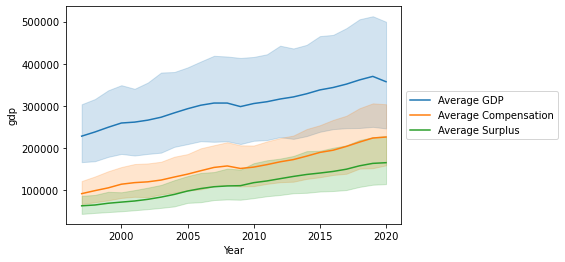

In [15]:
sns.lineplot(data = merge2, x = merge2.Year, y = merge2.gdp, ci = 95, label = "Average GDP")
sns.lineplot(data = merge2, x = merge2.Year,  y =  merge2["Compensation (millions of dollars)"], ci = 95, label = "Average Compensation")
sns.lineplot(data = merge2, x = merge2.Year, y = merge2.surplus, ci = 95, label = "Average Surplus")
plt.legend(loc = "center left", bbox_to_anchor = (1,0.5))

**Q3)** The mean GDP (over all States) seems to have decreased in 2020 as compared to 2019 *(you know why!)*. How many States observed a decrease in GDP in 2020 (as compared to 2019)? For which States did the GDP increase in 2020 (as compared to 2019)? *(2 points for code, 2 points for answers)*

In [51]:
merged_wide = pd.pivot(merge2, index = ["GeoName"], columns = "Year", values = "gdp")
merged_wide.head(2)

Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,144501.2,149568.2,154900.2,157221.3,156853.2,160422.4,165134.7,176625.0,184369.5,187270.8,...,187605.8,189245.5,191369.8,189886.3,191335.2,194283.8,197566.6,200800.9,203383.9,196906.1
Alaska,42211.3,41095.9,40590.5,39406.6,40958.7,42979.0,42355.3,44055.0,45657.1,49190.2,...,55280.3,58283.6,55354.3,54188.2,54740.8,54246.6,54129.5,53249.6,53336.5,50161.0


In [17]:
merged_wide.loc[merged_wide[2020] < merged_wide[2019]].shape[0]

49

There are 49 states where the GDP decreased in 2020 as compared to 2019.

In [18]:
merged_wide.loc[merged_wide[2020] > merged_wide[2019]]

Year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GeoName,,,,,,,,,,,,,,,,,,,,,
South Dakota,24951.2,26440.4,27463.4,29386.1,29455.2,32784.9,32979.1,34269.6,35842.2,36350.8,...,43049.5,43901.5,44147.4,44846.5,45664.5,46076.0,45878.2,46454.1,46641.0,46682.7
Utah,80658.9,85724.8,89282.0,92498.4,93556.7,95383.1,97017.3,102846.7,110046.4,118482.3,...,127992.5,129512.5,133112.9,136993.7,141720.5,147962.3,154367.3,163327.0,171134.7,171370.1


South Dakota and Utah had GDP's that actually increased in 2020 as compared to 2019.

**Q4**) Merge the file *State_region_mapping.csv* with the dataset obtained in Q1. Make a lineplot showing the mean GDP for each of the five regions with year. Do not display the confidence interval. Which two regions seems to have the least growth in GDP over the past 24 years? *(2 points for code, 1 point for answer)*

In [19]:
#Importing the new dataset
mapping = pd.read_csv("State_region_mapping.csv") 
mapping["GeoName"] = mapping["State"]
mapping.drop(columns = "State", inplace = True)

#Merging the datasets
merged = pd.merge(merge2, mapping)

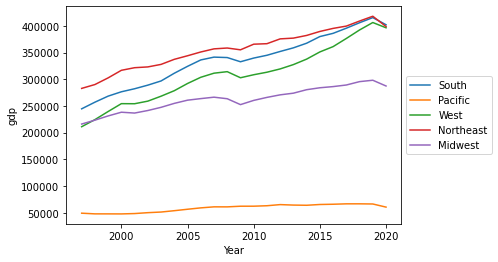

In [20]:
#Making lineplot
sns.lineplot(data = merged, x = "Year", y = "gdp", ci = None, hue = "Region")
plt.legend(loc = "center left", bbox_to_anchor = (1,0.5))

The two regions with the least growth in GDP over the past 24 years are the Pacific and the Midwest regions.

**Q5**) Identify the States contributing the most to the total GDP of their region, in 2020. Also, find the percentage contribution of these States to the total GDP of their region. *(2 points for code)*

**Hint**: You may use *DataFrameGroupBy.idxmax()* for the first part of this question.

In [21]:
merged = merged.loc[merged["Year"] == 2020]

merged1 = merged.groupby("Region")

merged1.gdp.idxmax()

Region
Midwest       335
Northeast     791
Pacific       287
South        1055
West          119
Name: gdp, dtype: int64

In [24]:
merged.loc[merged1.gdp.idxmax()] 

,GeoName,Year,gdp,surplus,Chain-type quantity indexes for real GDP,Compensation (millions of dollars),Region
335,Illinois,2020,737643.6,339030.6,101.548,482911.0,Midwest
791,New York,2020,1420141.0,752989.8,106.920,900256.6,Northeast
287,Hawaii,2020,70625.2,31098.0,98.220,47292.1,Pacific
1055,Texas,2020,1734321.1,724665.2,122.034,955947.0,South
119,California,2020,2663665.9,1245131.6,126.055,1658813.1,West


In [26]:
merged1['gdp'].max() / merged1['gdp'].sum()

Region
Midwest      0.197508
Northeast    0.395743
Pacific      0.584712
South        0.287612
West         0.560036
Name: gdp, dtype: float64

The states contributing the most to the total GDP of their region in 2020 are: Illinois, New York, Hawaii, Texas, and California, with  contribution percentages of 19.75%, 39.57%, 58.47%, 28.76%, and 56%, respectively.